# Análise Exploratoria


---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
pd.options.display.float_format = '{:20,.2f}'.format
axp = pd.read_excel("datasets/AdventureWorks.xlsx")



---
Novas colunas incluidas no dataframe.

---

In [2]:

axp["custo"] = axp["Custo Unitário"].mul(axp["Quantidade"]) 
axp["lucro"]  = axp["Valor Venda"] - axp["custo"] 
axp["Tempo_envio"] = axp["Data Envio"] - axp["Data Venda"]
total_custo = round(axp["custo"].sum(), 2)
total_lucro = round(axp["lucro"].sum(),2)
valor_venda = axp["Valor Venda"].sum()
axp.head(2)


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5 days


In [3]:
print("Custo Total: " + str(total_custo))
print("lucro Total: " + str(total_lucro))
print("Valor Venda: " + str(valor_venda))

Custo Total: 2486783.05
lucro Total: 3497823.09
Valor Venda: 5984606.1426


In [4]:
#Verificando se temos dados faltantes
axp.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [5]:

lucro_ano = axp.groupby([axp["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [6]:
axp.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

---
Cálculo e visualização do lucro.

---

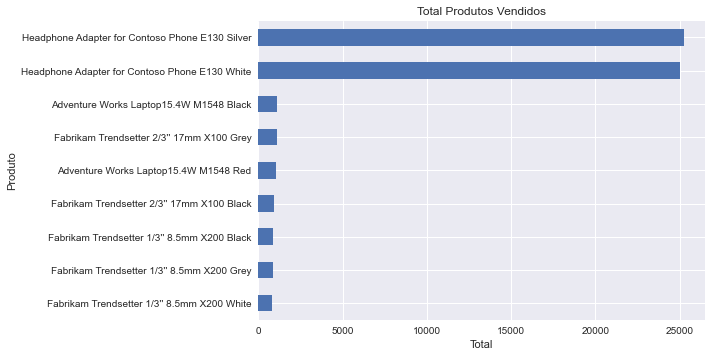

In [7]:

axp.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

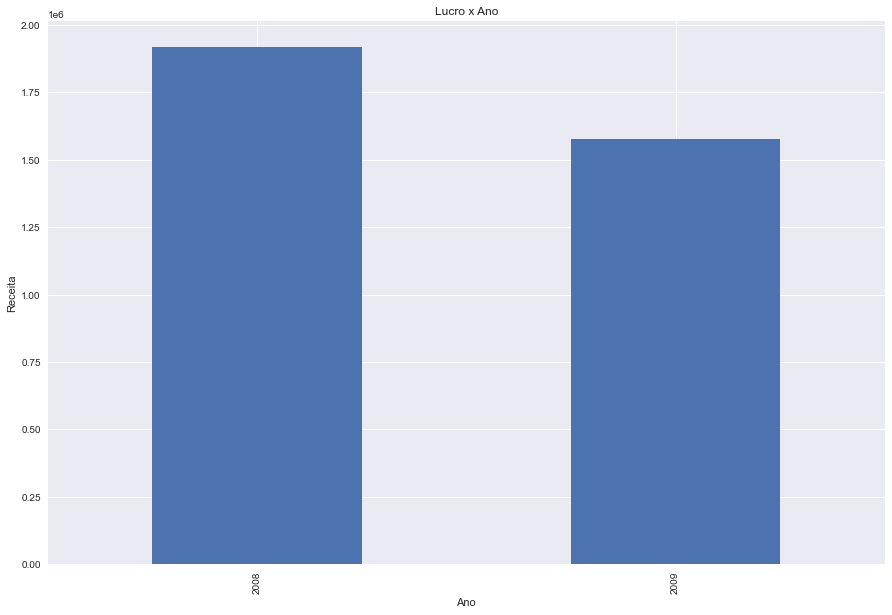

In [8]:
axp.groupby(axp["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano", figsize=(15,10))
plt.xlabel("Ano")
plt.ylabel("Receita");

In [9]:

axp_2009 = axp[axp["Data Venda"].dt.year == 2009]
axp_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12 days
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11 days


Text(0, 0.5, 'Lucro')

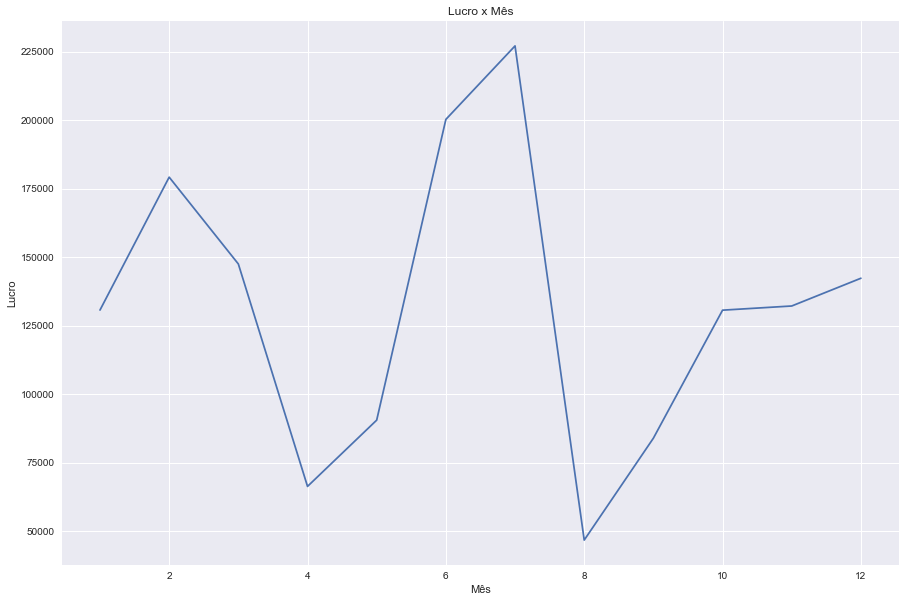

In [10]:
axp_2009.groupby(axp_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês", figsize=(15,10))
plt.xlabel("Mês")
plt.ylabel("Lucro")

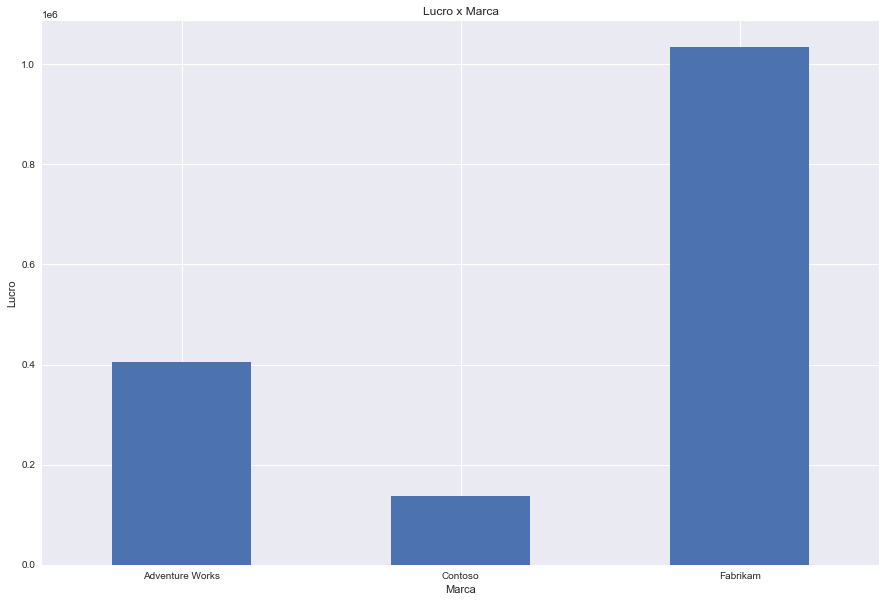

In [11]:
axp_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca", figsize=(15,10))
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

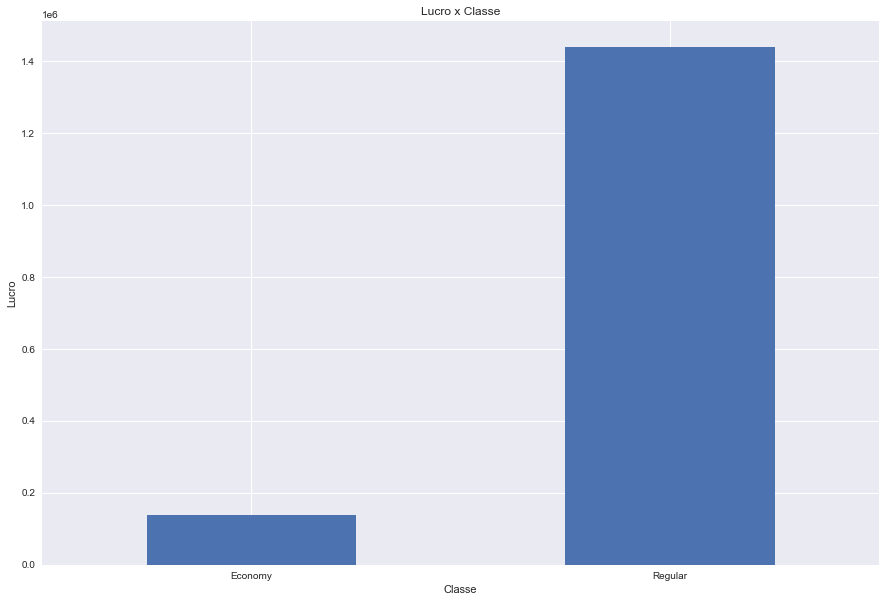

In [12]:
axp_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe", figsize=(15,10))
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

---
Cálculo e visualização do lucro.

---


In [13]:
axp["Tempo_envio"].describe()


count                          904
mean     8 days 13:02:07.433628318
std      3 days 01:21:57.877052211
min                4 days 00:00:00
25%                6 days 00:00:00
50%                9 days 00:00:00
75%               11 days 00:00:00
max               20 days 00:00:00
Name: Tempo_envio, dtype: object

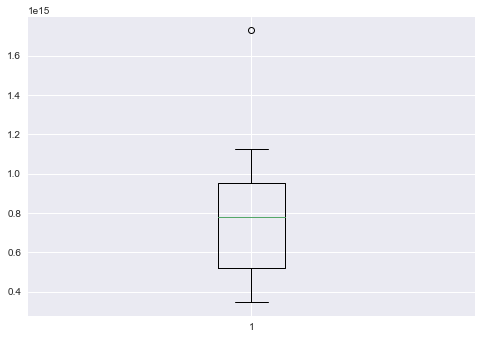

In [14]:
plt.boxplot(axp["Tempo_envio"]);

In [15]:
axp["Tempo_envio"].min()

Timedelta('4 days 00:00:00')

In [16]:
axp['Tempo_envio'].max()

Timedelta('20 days 00:00:00')

---
Busca do Outlier

---

In [18]:
#A busca precisa ser feita com uma string, na aula se usou float o que gerou uma exception.
axp[axp["Tempo_envio"] == "20 days"]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


---
Exportação de arquivo "CSV". Também fiz uma exportação no formato JSON para o uso de banco de dados Mongo

---

In [25]:
axp.to_json('Exports/vendas.json', orient='index')
axp.to_csv("Exports/vendas_novo.csv", index=False)